In [1]:
# These are the necessary imports for the following code
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [2]:
# As an example dataset we use the Iris dataset (https://archive.ics.uci.edu) loaded through sklearn.datasets: 
iris = load_iris()

In [3]:
# In the following lines we prepare the dataframe as well as the right labels
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df['target'].replace(0, "setosa", inplace=True)
df['target'].replace(1, "versicolor", inplace=True)
df['target'].replace(2, "virginica", inplace=True)
X = iris.data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Here we show the dimensions of the Dataframe
# The output is in the format (lines, columns)
df.shape

(150, 5)

In [5]:
# Creating a dictionary for the species to make later results easier to interpret
lookup_iris_target = dict(enumerate(df.target.unique()))
lookup_iris_target

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [6]:
# In the following cells we create a test split:

In [7]:
# Preparing a variable for the feature columns
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

# Preparing a variable for the species ('target') column
y = df['target']

In [8]:
# Actually creating the split
# We use a test split size of 30% at first and a random state of 0
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.30, random_state=0)

In [9]:
# In the following cells we implement the k-NN-algorithm which is a non-parametric supervised learning method:

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# We go for the next 3 Neighbours, but it would be possible to set other values to n_neighbors
knn = KNeighborsClassifier(n_neighbors = 3)

In [11]:
# Here we train the the classifier using the fit()-method
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
# Here we test the performance of the classifier
# The output is the percentage of correctly guessed test samples
knn.score(X_test, y_test)

0.9777777777777777

In [13]:
# In the next cells we create a confusion matrix which allows us to track exactly how many of which species were guessed right:

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
# Here we prepare the needed variables
predicted = knn.predict(X=X_test)
expected = y_test

In [16]:
# Here we create the confusion matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [17]:
# For more info on confusion matrixes go to: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
# The Output is structered like the following example:
# 1st column: which were predicted as setosa?
# 1st row: which are actually setosa?
confusion

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [18]:
# In the following cells we create a classification_report:

In [19]:
from sklearn.metrics import classification_report

In [20]:
# Here we use the previously created dictionary for the species names in preparation of the report
names = [lookup_iris_target[i] for i in range(len(lookup_iris_target))]
names

['setosa', 'versicolor', 'virginica']

In [21]:
# Here we print out the classification report using the method imported above
print(classification_report(expected, predicted, 
       target_names=names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [22]:
# About the Output:
# precision: from all the observations we have predicted, which are actually right? --> 100%
# recall: from all the versicolor, how many have been predicted as versicolor? --> 94 %
# macro avg = (1.00+0.97+0.96+)/3 => 0.9766
# weighted avg = 1.00 x 16/45 + 0.97 x 18/45 + 0.96 x 11/45 => 0.98

In [23]:
# In the following cells we examine the data and plot it through various methods:

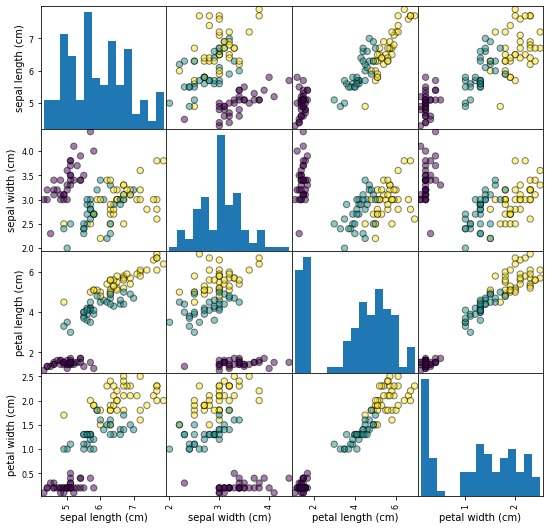

In [24]:
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

# Plotting the scatter matrix
y_train_local = y_train.replace({'setosa' : 0, 'versicolor' : 1, 'virginica' : 2})
scatter = pd.plotting.scatter_matrix(X_train, c= y_train_local, s=40,  marker = 'o', edgecolor='black', hist_kwds={'bins':15}, figsize=(9,9))

In [25]:
# In the next part of the project we classify new, previously unseen objects:

In [26]:
# Now we are creating data for a plant

my_columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# The measurements used shouldnt be mistaken for real data
example_iris_1 = pd.DataFrame([[5.4, 4.1, 1.36, 0.18]], columns=my_columns) 

print(example_iris_1)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.4               4.1               1.36              0.18


In [27]:
# Now we can let the algorithm guess the species

iris_prediction = knn.predict(example_iris_1)
print(iris_prediction)

['setosa']


In [28]:
# Another example with different plant data

example_iris_2 = pd.DataFrame([[6.15, 3.56, 4.98, 1.95]], columns=my_columns) # the measurements used shouldnt be mistaken for actual data
print(example_iris_2)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0               6.15              3.56               4.98              1.95


In [29]:
# Now we can let the algorithm also guess this species

iris_prediction = knn.predict(example_iris_2)
print(iris_prediction)

['versicolor']


In [30]:
# In the following part we visualise the outcomes with different split proportions:

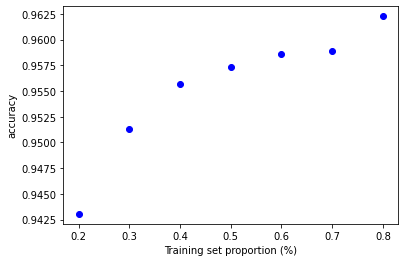

In [31]:
# Creating a needed Variable
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

# Here we use k = 3 for simplicity
knn = KNeighborsClassifier(n_neighbors = 3) 

plt.figure()

# Appending different scores for different test splits
for s in t:
    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

# Adding the right labels
plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

In [32]:
# In the following part we visualise the different outcomes with different values for k:

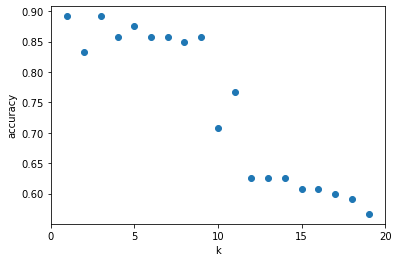

In [33]:
# Creating needed variables
k_range = range(1,20)
scores = []

# Appending the different scores for different k-values
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# Preparing the format of the figure
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);